In [2]:
import cv2, os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
print(os.getcwd())

c:\Users\antoine.lecroart\Documents\GitHub\Cell_Detector\Préproc


2464


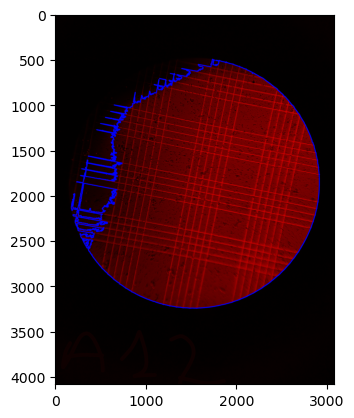

In [287]:
src = cv2.imread("Images/1678656447919.jpg", cv2.IMREAD_UNCHANGED) 
src[:,:,2] = np.zeros([src.shape[0], src.shape[1]])
src[:,:,1] = np.zeros([src.shape[0], src.shape[1]])

gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
_,edge = cv2.threshold(gray, 4, 1, cv2.THRESH_BINARY)



contours,_ = cv2.findContours(edge,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

nb_cont = 0
best = -1
print(len(contours))
for i, contour in enumerate(contours):
    if len(contours[i]) > nb_cont:
        nb_cont = len(contours[i])
        best = i
new = cv2.drawContours(src, contours, best,(0,0,255),10)

plt.imshow(new)